In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('group14_train.txt', sep=" ", header=None)
test = pd.read_csv('group14_test.txt', sep=" ", header=None)
val = pd.read_csv('group14_val.txt', sep=" ", header=None)

# take a look at the dataset
train.head(5)

,0,1
0,2.127,26.077
1,-0.306,13.302
2,2.835,103.970
3,2.817,94.879
4,1.788,22.100


In [0]:
train_X = np.asanyarray(train[0])
train_y = np.asanyarray(train[1])
test_X = np.asanyarray(test[0])
test_y = np.asanyarray(test[1])
val_X = np.asanyarray(val[0])
val_y = np.asanyarray(val[1])

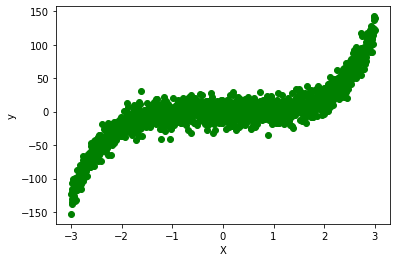

In [4]:
plt.scatter(train_X, train_y,  color='green')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [0]:
p=5

In [0]:
Z = np.ones((train_X.shape[0], p+1))
Z_val = np.ones((val_X.shape[0], p+1))
Z_test = np.ones((test_X.shape[0], p+1))
for i in range(1, p+1):
    Z[:, i] = np.power(train_X, i)
    Z_val[:, i] = np.power(val_X, i)
    Z_test[:, i] = np.power(test_X, i)

In [0]:
W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), train_y)

In [0]:
y_prediction = np.dot(W, Z.T)
y_val_prediction = np.dot(W, Z_val.T)
y_test_prediction = np.dot(W, Z_test.T)

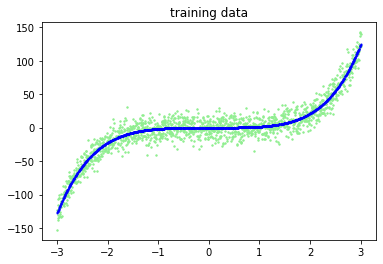

In [9]:
plt.scatter(train_X, train_y, s = 2, color = 'lightgreen')
plt.scatter(train_X, y_prediction, color = 'blue', s = 1)
plt.title('training data')
plt.show()

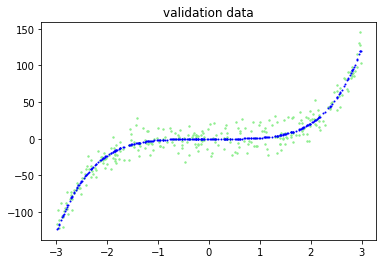

In [10]:
plt.title('validation data')
plt.scatter(val_X, val_y, s = 2, color = 'lightgreen')
plt.scatter(val_X, y_val_prediction, color = 'blue', s = 1)
plt.show()

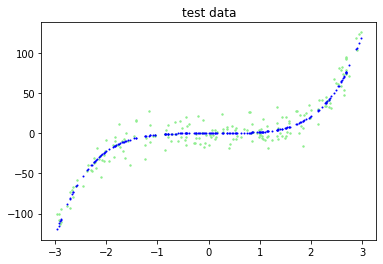

In [11]:
plt.title('test data')
plt.scatter(test_X, test_y, s = 2, color = 'lightgreen')
plt.scatter(test_X, y_test_prediction, color = 'blue', s = 1)
plt.show()

In [0]:
train_loss_RMS = np.sqrt(np.mean(np.square(y_prediction-train_y)))
val_loss_RMS = np.sqrt(np.mean(np.square(y_val_prediction-val_y)))
test_loss_RMS = np.sqrt(np.mean(np.square(y_test_prediction-test_y)))
losses={'train_loss': train_loss_RMS, 'validation_loss': val_loss_RMS, 'test_loss': test_loss_RMS}

In [13]:
losses

{'test_loss': 11.453672333219211,
 'train_loss': 11.455199266513336,
 'validation_loss': 11.738542915480616}

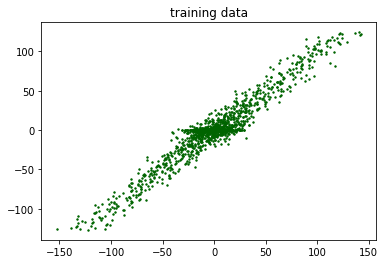

In [14]:
plt.title('training data')
plt.scatter(train_y, y_prediction, s = 2, color = 'darkgreen')
plt.show()

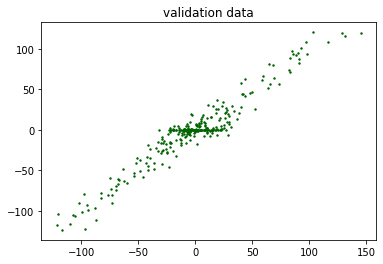

In [15]:
plt.title('validation data')
plt.scatter(val_y, y_val_prediction, s = 2, color = 'darkgreen')
plt.show()

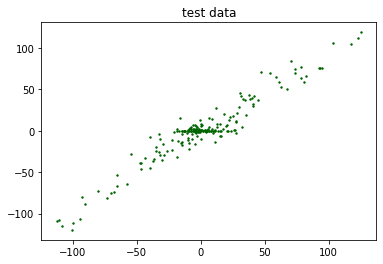

In [16]:
plt.title('test data')
plt.scatter(test_y, y_test_prediction, s = 2, color = 'darkgreen')
plt.show()

{'train loss': 41.76412853599175, 'validation loss': 42.491177887255844}
{'train loss': 23.842293697462917, 'validation loss': 23.61880838207258}
{'train loss': 23.83964537705948, 'validation loss': 23.61051693858445}
{'train loss': 12.02553546426578, 'validation loss': 12.202841098220217}
{'train loss': 12.025422013172458, 'validation loss': 12.20015153776496}
{'train loss': 11.455199266513336, 'validation loss': 11.738542915480616}
{'train loss': 11.454529309834907, 'validation loss': 11.72883791454445}
{'train loss': 11.453456397317133, 'validation loss': 11.728515539577835}
{'train loss': 11.452741146957933, 'validation loss': 11.729792279250173}
{'train loss': 11.452658928887365, 'validation loss': 11.728021154672518}
{'train loss': 11.451970834379633, 'validation loss': 11.738562963417968}
{'train loss': 11.434739886292174, 'validation loss': 11.782240406227286}
{'train loss': 11.426183751627203, 'validation loss': 11.75772536975695}
{'train loss': 11.42362532325213, 'validation 

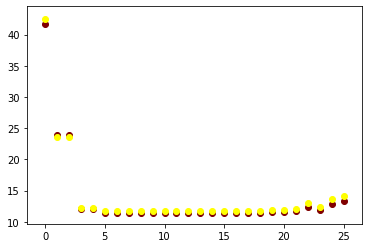

In [17]:
p_min = 0
p_max = 25
verbose = True

Z = np.ones((train_X.shape[0], 1))
Z_val = np.ones((val_X.shape[0], 1))

TrainLoss = []
ValLoss = []
for p in range(p_min, p_max+1):

    if p > 0:
        z = np.power(train_X, p)
        z = np.reshape(z, (z.shape[0], 1))
        z_val = np.power(val_X, p)
        z_val = np.reshape(z_val, (z_val.shape[0], 1))
        Z = np.hstack((Z, z))
        Z_val = np.hstack((Z_val, z_val))

    W = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(Z), Z)), np.transpose(Z)), train_y)

    y_prediction = np.dot(W, Z.T)
    y_val_prediction = np.dot(W, Z_val.T)

    trainlossRMS = np.sqrt(np.mean(np.square(y_prediction-train_y)))
    vallossRMS = np.sqrt(np.mean(np.square(y_val_prediction-val_y)))
    if verbose:
        print({'train loss': trainlossRMS, 'validation loss': vallossRMS})
    TrainLoss.append(trainlossRMS)
    ValLoss.append(vallossRMS)

plt.scatter(range(p_min, p_max+1), TrainLoss, color = 'maroon')
plt.scatter(range(p_min, p_max+1), ValLoss, color = 'yellow')